# 【AAPlot 单图版】
## 用于对Spike2输出的txt文件绘制时间序列图

1. 输入数据为Spike2直接输出的Spreadsheet类文件，格式为.csv或.txt.
2. 文件内容应为三列：
    - 第一列为时间
    - 第二列为数据点
    - 第三列为药物注射时间打标，数据中改行显示为1，多图时根据打标位置做align。多个trace应该分别存为txt文件保存在同一个文件夹下
3. 在`PLOT` 运行环境下工作
    
    PLOT环境：

    - Python3.12.7
    - pandas
    - numpy
    - matplotlib
    - seaborn
    - ipykernel

*注意:*

*! 运行前确保安装了最新版 `Anaconda`，并添加到系统PATH（可参考网络上配置方法）*

*! 运行前确保配置好了`PLOT`环境: `conda env create -n PLOT python=3.12.7 pandas numpy matplotlib seaborn ipykernel` (ARM64处理器可以使用Python3.13.3，注意在命令最后添加conda-forge)*

*VScode 下运行环境：直接在Kernel中选择即可*

*命令行下运行环境：`conda activate PLOT`*

## Step1：数据输入

In [2]:
# 导入必要库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 读取数据
# file_path = r'D:\Science\My Paper\Selective eCB sensors\00Figure data\In vivo\Drug intake\Nicotine_0.5mpk\Napepld-KO-NAcSh-AEA1.5-2-AG1.5-2mpk-nicotine\sv.txt'  # windows，替换为你的文件路径
file_path = '/Users/lilab/Library/CloudStorage/坚果云-cairuyi1997@gmail.com/Science/My Paper/Selective eCB sensors/00Figure data/In vivo/Drug intake/Nicotine_0.5mpk/Napepld-KO-NAcSh-AEA1.5-2-AG1.5-2mpk-nicotine/sv.txt'  # mac/linux，替换为你的文件路径
data = pd.read_csv(file_path, sep=',') 

# 将第三列数据为1时的时间设定为0，重新调整时间
data.iloc[:, 0] = data.iloc[:, 0] - data.iloc[:, 0][data.iloc[:, 2] == 1].values[0]

# 重算时间为小时
data.iloc[:, 0] = data.iloc[:, 0] / 3600

# 重算时间为分钟
# data.iloc[:, 0] = data.iloc[:, 0] / 60

# 显示数据的前几行 （DEBUG用，正式版本需要删除）
# print(data.head())

       Time  4006 Virtual  2 Events
0 -0.951306      5.666940         0
1 -0.951278      5.647866         0
2 -0.951250      5.628792         0
3 -0.951222      5.609718         0
4 -0.951194      5.590645         0


## Step2：作图

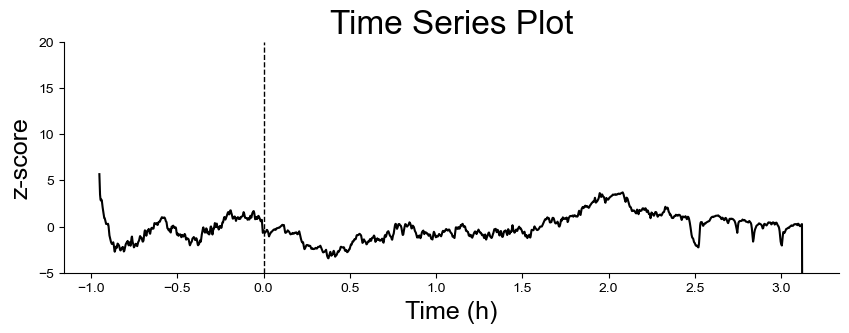

In [4]:
# data数据第一列第二行开始为时，第二列第二行开始为数据，第三列为打标
# 作时间序列图，横轴时间，纵轴数据
plt.figure(figsize=(10, 3)) # 图像大小

plt.plot(data.iloc[:, 0], data.iloc[:, 1], label='Data', color='black') # 绘制数据曲线
plt.rcParams['font.sans-serif'] = ['Arial']  # 设置字体为Arial

# 删除图像边框
sns.despine()

# plt.xlim(0, 4)  # 设置x轴范围
plt.ylim(-5, 20)  # 设置y轴范围

plt.xlabel('Time (h)', fontsize=18) # 设置x轴标签
plt.ylabel('z-score', fontsize=18) # 设置y轴标签

# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 添加y=0的虚线

# plt.xticks(np.arange(0,5,1),fontsize=16) # 设置x轴刻度
# plt.yticks(np.arange(-3,6.5,3),fontsize=16) # 设置y轴刻度

plt.title('Time Series Plot',fontsize=24)

# 在第三列数值为1处添加竖线
for i in range(1, len(data.iloc[:, 2])):
    if data.iloc[i, 2] == 1:
        plt.axvline(x=data.iloc[i, 0], color='black', linestyle='--', linewidth=1)

# plt.legend(fontsize=16) # 添加图例

plt.gcf().patch.set_alpha(0.0)  # 设置图像背景透明
plt.gca().patch.set_alpha(0.0)  # 设置数据区域背景透明

# 保存为svg格式
plt.savefig(file_path+'_plot.svg', format='svg', bbox_inches='tight')
